In [3]:
import numpy as np
rng = np.random.default_rng(seed=1701)

x = rng.integers(100, size=10)
print(x)

[90 40  9 30 80 67 39 15 33 79]


In [4]:
[x[3], x[7], x[2]]

[30, 15, 9]

In [5]:
ind = [3, 7, 4]
x[ind]

array([30, 15, 80], dtype=int64)

In [6]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[30, 15],
       [80, 67]], dtype=int64)

In [7]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [9]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [10]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [11]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [12]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [13]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [14]:
mask = np.array([True, False, True, False])
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [15]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

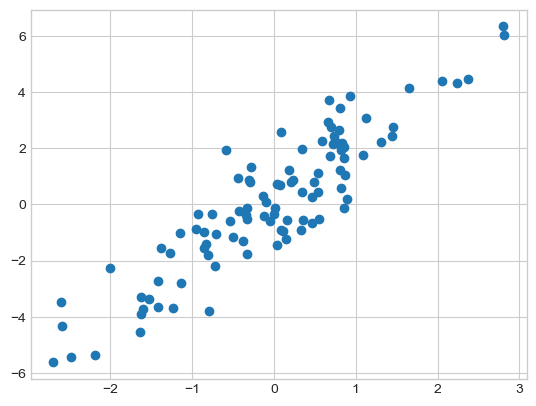

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(X[:, 0], X[:, 1]);

In [17]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([41, 89, 85, 19, 27, 90,  8, 59, 88, 18,  0, 54,  6, 74, 92, 50, 11,
       64, 62, 69])

In [18]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

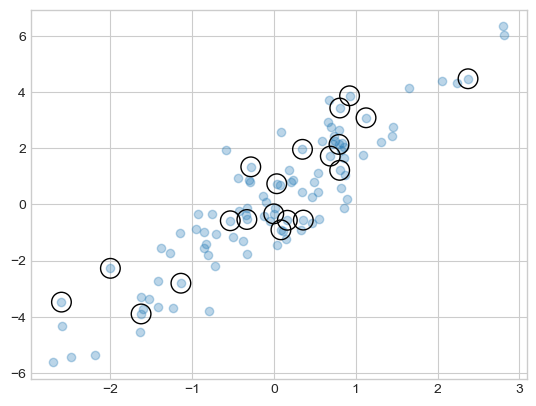

In [19]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', edgecolor='black', s=200);

In [20]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [21]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [22]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [24]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [25]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)

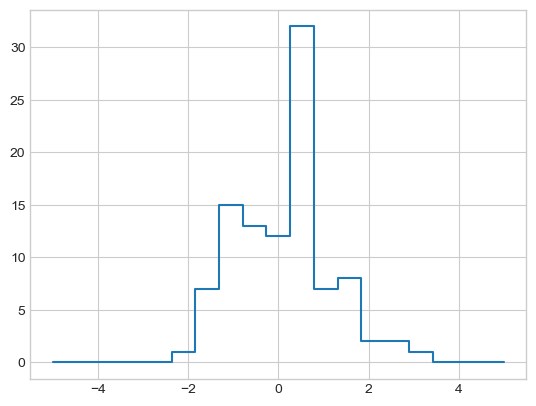

In [26]:
plt.plot(bins, counts, drawstyle='steps');

In [27]:
print(f"NumPy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)

print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy histogram (100 points):
31.6 µs ± 2.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom histogram (100 points):
17.4 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
x = rng.normal(size=1000000)
print(f"NumPy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)

print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy histogram (1000000 points):
74.3 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom histogram (1000000 points):
117 ms ± 4.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
